In [10]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))  
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size, shuffle=False))

In [11]:
train_iter, test_iter = load_data_fashion_mnist(batch_size=32)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 28, 28]) torch.float32 torch.Size([32]) torch.int64


In [12]:
from torch import nn

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

num_epochs = 150
for epoch in range(num_epochs):
    for X, y in train_iter:
        l = loss_fn(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    acc = accuracy(net(X), y)
    print(f'epoch {epoch + 1},accuracy {acc:f}')

epoch 1, loss 0.218377, accuracy 30.000000
epoch 2, loss 0.389133, accuracy 30.000000
epoch 3, loss 0.420529, accuracy 29.000000
epoch 4, loss 0.338723, accuracy 28.000000
epoch 5, loss 0.349119, accuracy 29.000000
epoch 6, loss 0.715697, accuracy 26.000000
epoch 7, loss 0.126484, accuracy 32.000000
epoch 8, loss 0.449280, accuracy 27.000000
epoch 9, loss 0.371843, accuracy 30.000000
epoch 10, loss 0.106675, accuracy 32.000000
epoch 11, loss 0.454163, accuracy 27.000000
epoch 12, loss 0.516590, accuracy 28.000000
epoch 13, loss 0.582746, accuracy 24.000000
epoch 14, loss 0.406100, accuracy 30.000000
epoch 15, loss 0.445568, accuracy 27.000000
epoch 16, loss 0.294844, accuracy 30.000000
epoch 17, loss 0.344805, accuracy 29.000000
epoch 18, loss 0.344926, accuracy 30.000000
epoch 19, loss 0.433578, accuracy 29.000000
epoch 20, loss 0.300857, accuracy 31.000000
epoch 21, loss 0.424733, accuracy 29.000000
epoch 22, loss 0.297320, accuracy 29.000000
epoch 23, loss 0.504771, accuracy 29.0000

KeyboardInterrupt: 

In [ ]:
import torch
from torch import nn
from torch.utils import data
from torchvision import transforms, datasets

# ------------------------------
# 1️⃣ Load dataset
# ------------------------------
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    
    mnist_train = datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
    mnist_test = datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
    
    return (data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False))

batch_size = 60
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# ------------------------------
# 2️⃣ Define linear model (no ReLU)
# ------------------------------
net = nn.Sequential(
    nn.Flatten(),         # flatten 28x28 → 784
    nn.Linear(784, 10)
)

# Initialize weights
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

# ------------------------------
# 3️⃣ Define loss and optimizer
# ------------------------------
loss_fn = nn.CrossEntropyLoss()         # includes Softmax internally
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

# ------------------------------
# 4️⃣ Accuracy function
# ------------------------------
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    return (y_hat == y).float().sum().item()

def evaluate_accuracy(net, data_iter):
    acc_sum, n = 0, 0
    net.eval()  # inference mode
    with torch.no_grad():
        for X, y in data_iter:
            acc_sum += accuracy(net(X), y)
            n += y.shape[0]
    net.train()  # back to training mode
    return acc_sum / n

# ------------------------------
# 5️⃣ Training loop
# ------------------------------
num_epochs = 20
for epoch in range(num_epochs):
    train_loss_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        y_hat = net(X)
        l = loss_fn(y_hat, y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
        train_loss_sum += l.item() * y.shape[0]
        train_acc_sum += accuracy(y_hat, y)
        n += y.shape[0]
    
    test_acc = evaluate_accuracy(net, test_iter)
    print(f'Epoch {epoch+1:2d} | '
          f'Loss {train_loss_sum/n:.4f} | '
          f'Train Acc {train_acc_sum/n:.4f} | '
          f'Test Acc {test_acc:.4f}')


Epoch  1 | Loss 0.6217 | Train Acc 0.7913 | Test Acc 0.7941
Epoch  2 | Loss 0.4882 | Train Acc 0.8324 | Test Acc 0.8251
Epoch  3 | Loss 0.4649 | Train Acc 0.8404 | Test Acc 0.8316
Epoch  4 | Loss 0.4502 | Train Acc 0.8438 | Test Acc 0.8306
Epoch  5 | Loss 0.4398 | Train Acc 0.8499 | Test Acc 0.8337
Epoch  6 | Loss 0.4341 | Train Acc 0.8498 | Test Acc 0.8401
Epoch  7 | Loss 0.4273 | Train Acc 0.8523 | Test Acc 0.8392
Epoch  8 | Loss 0.4250 | Train Acc 0.8531 | Test Acc 0.8411
Epoch  9 | Loss 0.4230 | Train Acc 0.8538 | Test Acc 0.8418


KeyboardInterrupt: 

True label: Trouser, Predicted: Trouser
Class probabilities:
tensor([3.2408e-04, 9.8510e-01, 2.1271e-04, 1.3038e-02, 1.3090e-03, 6.0937e-10,
        9.5145e-06, 7.5797e-07, 3.1912e-06, 5.2056e-07])


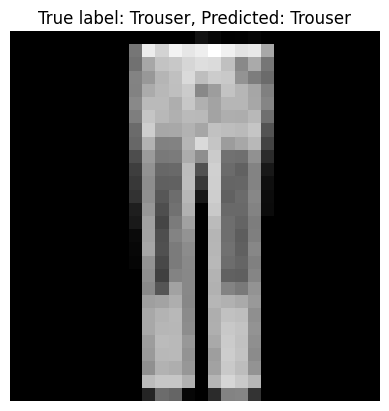

In [115]:
import torch
import matplotlib.pyplot as plt

# Pick a random image from the test set
X, y = next(iter(test_iter))  # a batch
i = torch.randint(0, len(X), (1,)).item()

img = X[i]
true_label = y[i].item()

# Get prediction (must add batch dimension)
with torch.no_grad():
    logits = net(img.unsqueeze(0))          # shape: [1, 10]
    probs = torch.softmax(logits, dim=1)    # convert to probabilities
    pred_label = probs.argmax(dim=1).item() # highest probability index
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print(f"True label: {classes[true_label]}, Predicted: {classes[pred_label]}")
print(f"Class probabilities:\n{probs.squeeze()}")

# Visualize the image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"True label: {classes[true_label]}, Predicted: {classes[pred_label]}")
plt.axis("off")
plt.show()
